In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# dict
data = { 'name': ['Li', 'Zhang', 'Wang'],
         'year': [2000, 2001, 2002]}  # type(data) 为 dict

In [3]:
# dict to series
# 若不指定 index，data 的 key 充当 Series 的 index; data 的 value 充当 Series 的 item
ser = Series(data)
print('ser:\n', ser)


ser:
 name     [Li, Zhang, Wang]
year    [2000, 2001, 2002]
dtype: object


In [4]:
# dict to dataframe
# 若不指定 columns，data 的 key 充当 DataFrame 的 columns
df = DataFrame(data)
print('df\n', df)

df
     name  year
0     Li  2000
1  Zhang  2001
2   Wang  2002


In [5]:
# dataframe
data = DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
print("DF:\n",data)
print("=====================")

# # dataframe to array
# arr = data.values
# print("arr:\n",arr)
# print("=====================")
# mat_arr = np.matrix(arr)
# # print("mat_arr:\n",mat_arr)
# type(mat_arr)
# df_arr = DataFrame(arr,columns=['a','b','c'])
# df_arr

data["a"].tolist()

DF:
    a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


[1, 4, 7]

In [5]:
list1 = [1,2,3]
ser1 = Series(list1,name="啥")
list2 = [4,5,6]
ser2 = Series(list2,name="嘞")

df1 = DataFrame([ser1,ser2]).T
df1

df1

,啥,嘞
0,1,4
1,2,5
2,3,6


In [6]:
# np.array(df1.values)
DataFrame(df1.values,columns=['sha','lei'])

NameError: name 'df1' is not defined

In [7]:
#-------------------------------------------------------------------------------------------

<div class="frontmatter text-center" style="font-size:15pt;">
    Introduction to Data Science
    
    Scientific programming with numpy
    
    
      
</div>

useful links:
 - http://shorturl.at/gjuAG or https://blog.csdn.net/rosefun96/article/details/78970239#:~:text=ndarray%20%E6%98%AF%20numpy%20%E7%9A%84%E6%95%B0%E6%8D%AE%E7%B1%BB%E5%9E%8B%EF%BC%9B%20list%20%E5%92%8C%20dict,%E6%98%AF%20python%20%E7%9A%84%E6%95%B0%E6%8D%AE%E7%B1%BB%E5%9E%8B%EF%BC%9B%20series%20%E6%98%AF%20pandas%20%E7%9A%84%E4%B8%80%E7%A7%8D%E6%95%B0%E6%8D%AE%E7%B1%BB%E5%9E%8B%EF%BC%8CSeries%E6%98%AF%E4%B8%80%E4%B8%AA%E5%AE%9A%E9%95%BF%E7%9A%84%EF%BC%8C%E6%9C%89%E5%BA%8F%E7%9A%84%E5%AD%97%E5%85%B8%EF%BC%8C%E5%9B%A0%E4%B8%BA%E5%AE%83%E6%8A%8A%E7%B4%A2%E5%BC%95%E5%92%8C%E5%80%BC%E6%98%A0%E5%B0%84%E8%B5%B7%E6%9D%A5%E4%BA%86%E3%80%82

# Numpy: multidimensional arrays
## Introduction

`numpy`包(模块)用于使用Python的几乎所有数值计算。它是一个为Python提供高性能矢量、矩阵和高维数据结构的包。

它是用C语言和Fortran语言实现的，所以当计算被向量化(用向量和矩阵表示)时，性能非常好。

要使用`numpy`，需要导入模块。标准的方法是:

In [16]:
import numpy as np
np.__version__

'1.21.5'

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib具体作用:当你调用matplotlib.pyplot的绘图函数plot()进行绘图或生成一个figure画布的时候，
# 可以直接在你的python console里面生成图像。
# 而我们在spyder或者pycharm实际运行代码的时候，可以直接注释掉这一句，也是可以运行成功的。如下示例：


`numpy`包中用于向量、矩阵和高维数据集的术语是数组。`Numpy`的数组对象称为`ndarray`，表示n维数组。

**Reminder about Built In Documentation**

As you read through this chapter, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature), as well as the documentation of various functions (using the ``?`` character).

For example, to display all the contents of the numpy namespace, you can type this:

```ipython
np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
np?
```

More detailed documentation can be found at https://numpy.org/doc/stable/user/basics.html.

# Creating `ndarray`

初始化新的`ndarray`:

 - from `list` or `tuple`
 - 使用专门用于生成numpy数组的函数，如`arrange`、`linspace`等
 - 从文件中读取数据

## From `np.array(list)`

要从Python列表中创建新的向量和矩阵数组，可以使用`np.array`函数

 - `list`可以用`range`+`for`创建
 - `list`默认按行处理，嵌套`list`按列处理成矩阵
 

In [18]:
np.array([[1],[2]])

array([[1],
       [2]])

In [11]:
np.array(range(0,101,12))

array([ 0, 12, 24, 36, 48, 60, 72, 84, 96])

In [12]:
# a vector: the argument to the array function is a Python list
np.array([1,"a",3,4])

array(['1', 'a', '3', '4'], dtype='<U21')

与`list`不同，`NumPy`被限制为所有包含相同类型的数组。

如果类型不匹配，NumPy将在可能的情况下向上转换(这里，整数向上转换为浮点数):

In [15]:
np.array([3.14, 4, 2, 3],dtype = float)

array([3.14, 4.  , 2.  , 3.  ])

如果想显式设置结果数组的数据类型，可以使用关键字` dtype `:

Common data types that can be used with dtype are: `int, float, complex, bool`, object, etc.

We can also explicitly define the bit size of the data types, for example: `int64, int16, float128, complex128`.

In [4]:
np.array([1 , 2 , 3 , 4])

array([1, 2, 3, 4])

In [5]:
# 用for循环
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### `np.ndim / .ndim`: ndarray的嵌套程度

In [14]:
np.ndim(np.array([[[1], [2]]])) # 这里检查的实质上是嵌套程度

3

The `v` and `M` objects are both `ndarray`.

In [15]:
v = np.array([1,2,3,4])
M = np.array([[1,2],[3,4]])
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

### `np.shape / .shape`: ndarray的行列

The difference between the `v` and `M` arrays is their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [16]:
v.shape, M.shape

((4,), (2, 2))

### `np.size/ .size`: ndarray的元素个数
The number of elements in the array is available through the `ndarray.size` property:

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [17]:
np.shape(M)

(2, 2)

In [18]:
np.size(M)

4

到目前为止，`np.ndarray`看起来很像一个Python列表(或嵌套列表)。为什么不简单地使用Python列表进行计算，而不是创建一个新的数组类型?

有几个原因:

* Python列表非常通用。它们可以包含任何类型的对象。它们是动态类型的。它们**不支持矩阵和点乘法等数学函数**。由于动态类型，为Python列表实现这样的函数不会非常有效。
* Numpy数组是静态类型和同构的。元素的类型是在创建数组时确定的。
* Numpy数组是有效的内存。
* 由于静态类型，数学函数的快速实现，如' numpy '数组的乘法和加法，可以在编译语言中实现(使用C和Fortran)。


### `.dtype`:ndarray的数据类型
使用' ndarray '的' dtype '(数据类型)属性，我们可以看到数组的数据具有什么类型:

In [19]:
M.dtype

dtype('int32')

如果试图将错误类型的值赋给`numpy`数组中的元素，就会得到一个错误:

In [20]:
# M[0,0] = "hello"

## From` arrange / linspace`

对于较大的数组，使用显式的python列表手动初始化数据是不切实际的。

相反，我们可以使用`numpy`中的一个函数来生成不同形式的数组。一些更常见的是:

### `arange(起点 终点 步长)`
终点不包括！

In [21]:
# create a range
x = np.arange(0, 10, 1) # Like the function range for lists!
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
x = np.arange(-1, 1, 0.1) # 同R，起点 终点 步长
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

### `linspace / logspace (起点 终点 个数)`
包括终点！

In [23]:
# using linspace, both end points ARE included
np.linspace(0, 1, 5) # 起点 终点 个数

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [24]:
# In linear space, the sequence starts at ``base ** start`` and ends with ``base ** stop``.
np.logspace(0, 1, 5, base=10), 10**0, 10**0.25, 10**0.5

(array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ]),
 1,
 1.7782794100389228,
 3.1622776601683795)

**由开发者提醒,是np.sin(array)与math.sin (标量)不兼容导致的问题.将调用的math相关的三角函数改成numpy即可**

### Random data

In [22]:
# Create an array of the given shape and populate it with random samples from U[0,1].
np.random.rand(2,2,2)

array([[[0.24639245, 0.89488059],
        [0.96042973, 0.11011664]],

       [[0.36508911, 0.40160408],
        [0.25850999, 0.73738149]]])

standard normal distributed random numbers $\mu = 0$ and $\sigma^2=1$

In [26]:
np.random.randn(5,5)

array([[ 1.87540373,  0.97093332, -1.63968982, -0.34885221, -0.6336158 ],
       [-0.15323348, -0.4650773 ,  0.15390699, -0.34201581,  1.15057493],
       [-0.85533733,  0.02407958, -0.35647926,  0.19982287,  0.12836967],
       [-0.49289792,  0.27424401, -0.10673708,  1.48955576,  1.17797743],
       [ 2.30672412,  0.16763991,  1.3385802 , -0.16658371,  1.65513074]])

There is a huge variety of functions that you can use: 
<img src="files/random1.png" width="700px"/>



and you can generate samples from all the major distributions.
Have a look at the documentation at https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html:
<img src="files/random2.png" width="700px"/>

### 0/1数组

你也可以创建包含相同元素的数组:

#### `np.zeros()`0 Array

In [27]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

#### `np.ones()`1 Array

In [29]:
np.ones((3,5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

#### Other Identical Array

In [30]:
np.zeros((3,3))+2 # We will see more matrix and vector operations later

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [31]:
np.ones((3,3))*4 # We will see more matrix and vector operations later

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

#### `np.diag()`Diag Array
 - 一维数组->对角矩阵
 - 二维数组->提取对角线

In [20]:
a=np.diag([2,3,4])
a

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

In [21]:
np.diag([[2,3,4],[5,7,9],[3,9,10]])

array([ 2,  7, 10])

#### `np.eye()`Identical Array

In [34]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Manipulating arrays
## `[index1,index2,...]`Indexing
可以使用`[ ]`和 index 来索引数组中的元素:

注意是从0开始的！


In [28]:
v = np.array([1,2,3,4])
M = np.array([[1, 2], [3, 4]])
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [29]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

<img src="files/indexing.png" width="400px"/>

### index omit ‘:’= all
省略多维数组的索引:
 - 省后：它将返回整行(或者，通常是N-1维数组)
 - 省前：8行--> :占位

In [30]:
M

array([[1, 2],
       [3, 4]])

In [26]:
M[1]

array([3, 4])

In [27]:
M[:,1]

array([2, 4])

***
### 比较list索引和array索引
If I have a list of lists, what is the syntax to access the first element of the first list? Pay attention to the difference with arrays!

 - list:索引必须是先行后列`[row][col]`
 - array: 可以先行后列`[row][col]`，也可以直接索引`[row,col]`（非常重要！）
***

In [31]:
lists = [[1,2],[3,4]]
lists[0][0]

1

In [36]:
arrays = np.array([[1,2],[3,4]])
arrays[0,0], arrays[0][0]

(1, 1)

## `[from:to:step]`Index slicing

Index slicing 是语法[lower:upper:step]的技术名称，用于提取数组的一部分:

**注意到，可以省略step:   [lower:upper]**

In [33]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

它的工作方式与**list**相同，

In [34]:
A[1:3] # 前闭后开

array([2, 3])

### 可以赋值，比较，运算

In [35]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

### `A[::]=A[:]=A`Take All

In [38]:
A[1:3]=[2,3]
A[::] # lower, upper, step all take the default values

array([1, 2, 3, 4, 5])

### [::s]Take all by s step


In [46]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([1, 3, 5])

In [47]:
A[:3] # first three elements

array([1, 2, 3])

In [48]:
A[3:] # elements from index 3

array([4, 5])

### `[-k:]`从-k开始向右计数

负索引从数组的末尾开始**向右**计数(正索引从开始计数):

In [49]:
A[-1:]

array([5])

In [50]:
A[-3:]

array([3, 4, 5])

### `[::-1]`向左计数

In [39]:
A[::-1, ::-1] # 先运行下面！

array([[44, 43, 42, 41, 40],
       [34, 33, 32, 31, 30],
       [24, 23, 22, 21, 20],
       [14, 13, 12, 11, 10],
       [ 4,  3,  2,  1,  0]])

### [row_indexs,col_indexs]  simutaneous slice
**索引切片**应用比先行后列广泛

In [38]:
# 这有点复杂...
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [40]:
# 取中间的那个3*3矩阵
B = A[1:4, 1:4]

In [41]:
B,A

(array([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]]),
 array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34],
        [40, 41, 42, 43, 44]]))

<img src="files/slicing.png" width="400px"/>

In [42]:
A[4:,:] # 最后一行

array([[40, 41, 42, 43, 44]])

In [43]:
A[4,:]

array([40, 41, 42, 43, 44])

## An index slice only creates a view!
与列表的一个重要区别是，数组切片是原始数组上的映射:**<span style="color:green">数据不会被复制，对视图的任何修改都将反映在源数组中!</span>**

### list2=list1[:]:address diff
列表的“切片赋值”，指向不同地址

In [45]:
a = [1,2,3]
b = a[:]
print ("data:",a, b)
print("place:",id(a),id(b))
b[0] = 5
print("data:",a,b)

data: [1, 2, 3] [1, 2, 3]
place: 140333276864256 140333276884544
data: [1, 2, 3] [5, 2, 3]


### nd2=nd1[:]:address same¶
ndarray的“切片赋值”，指向相同地址

In [48]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [50]:
arr_slice[:] = 666
arr

array([  0,   1,   2,   3,   4, 666, 666, 666,   8,   9])

In [51]:
arr[:] = 999
arr_slice

array([999, 999, 999])

In [52]:
lt = [1,2,3,4,5]
lt[1:3] = [99,98]
lt

[1, 99, 98, 4, 5]

### `arr[5:8].copy()`:address diff

## Fancy indexing
Fancy indexing 是指用数组或列表代替索引:

In [62]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [63]:
row_indices = [1, 2, 3]
A[row_indices,:] # 它选择了A的第二，第三和第四行，以及它的所有列

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

<span style="color:red">花哨的索引与切片不同，总是将数据复制到一个新数组中</span>

In [64]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [65]:
# 选择（1,1），（2,2），（3，-1）元素
col_indices = [1, 2, -1]
row_indices = [1, 2, 3]
A[row_indices, col_indices]

array([11, 22, 34])

In [66]:
different_col_indices = [1, -1, 2] 
#What is the outcome of this?> A[row_indices, different_col_indices]
A[row_indices, different_col_indices]

array([11, 24, 32])

## Boolean Indexing

也可以使用索引掩码:如果索引掩码是数据类型bool的Numpy数组，则根据每个元素所在位置的索引掩码值选择(True)或不选择(False)元素:

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [50]:
B = np.arange(0,5)
B

array([0, 1, 2, 3, 4])

In [51]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

### Boolean Array:0=False,o.w.=True
通过显式定义`dtype`，可以获得数字/boolean

In [69]:
row_mask = np.array([3,0,1,0,0], dtype=bool)
row_mask

array([ True, False,  True, False, False])

### Boolean Array Operation

<span style="color:red">The Python keywords `and` and `or` do not work with boolean arrays. Use instead `&`/`*` and `|`/`+`.</span>

In [54]:
l1 = np.array([1,0,1,0,1], dtype=bool)
l2 = np.array([1,1,1,0,0], dtype=bool)
l3 = np.array(l1 & l2,dtype = int)
l4 = np.array(l1 | l2,dtype = int)
l5 = np.array(l1 * l2,dtype = int)
l6 = np.array(l1 + l2,dtype = int)
print("&: ",l3,"  |: ",l4)
print("*: ",l5,"  +: ",l6)

&:  [1 0 1 0 0]   |:  [1 1 1 0 1]
*:  [1 0 1 0 0]   +:  [1 1 1 0 1]


In [55]:
l1 & l2

array([ True, False,  True, False, False])

### Indexing by Boolean

In [56]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool) #1 is true, 0 is false
B[row_mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 5

这个特性对于**有条件地从数组中选择元素**非常有用，例如使用比较操作符:

In [58]:
x = np.arange(-1, 8, 0.5)
x

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
        4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5])

In [59]:
(3 < x) & (x < 6.5)

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False])

In [60]:
x[(3 < x) & (x < 6.5)] # Always use parentheses for mask conditions. Only then can you join them with & and | 

array([3.5, 4. , 4.5, 5. , 5.5, 6. ])

## Extracting & Replacing in arrays

### `where`boolean->position

np.where()分两种调用方式：

1. 三个参数np.where(cond,x,y)：满足条件（cond）输出x，不满足输出y

2. 一个参数np.where(arry)：输出arry中‘True’值的坐标(‘真’也可以理解为非零)

索引掩码可以使用`where`函数转换为位置索引

In [63]:
x = np.arange(-1, 8, 0.5)
mask = (3 < x) * (x < 6.5)
indices = np.where(mask,'y','n')
indices

array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y',
       'y', 'y', 'n', 'n', 'n'], dtype='<U1')

In [64]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

IndexError: arrays used as indices must be of integer (or boolean) type

In [65]:
x

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
        4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5])

使用布尔数组设置值以一种常识性方式工作。要将所有负数设置为0，我们只需要做:

In [66]:
x[x < 0] = 0
x

array([0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ,
       5.5, 6. , 6.5, 7. , 7.5])

# File I/O

## `numpy.loadtxt`读入
要从这样的文件中读取数据到Numpy数组中。

In [69]:
r = np.random.randn(100)
np.savetxt("RandomNormal.txt",r)
r1 = np.loadtxt("RandomNormal.txt",dtype="float")
r1

array([ 0.27601407, -0.76935695, -0.52356456, -0.82419346,  0.47541003,
       -0.58879581,  1.31601223,  0.69593209, -0.44940868, -1.07188199,
        0.26871311,  0.38468611, -0.92706226, -0.40044306,  0.04169611,
        1.32447154,  2.17073181, -0.94341832,  1.93673829, -0.46298679,
        0.33141058,  0.12688826,  0.01240855,  0.98029438,  1.80453878,
       -0.1778196 , -1.05488982, -0.43970161,  0.66231144, -0.15261155,
        1.66315736, -0.25911302, -2.57601599,  0.60849049,  0.27291995,
        0.23910933,  1.49502594, -0.94381952,  1.29971853, -0.44132272,
        0.34519496, -0.57480984,  0.64576986, -1.11654283, -0.41405354,
       -0.89473707, -1.62577309,  0.9568425 ,  0.60677332, -0.77720407,
       -1.67245946, -0.6959683 , -1.71446517,  0.30029184, -1.37790787,
       -1.49354475,  1.34491187, -0.10111024,  0.46202226, -0.18850402,
        1.50086428, -1.39836958, -0.57028627, -0.86391128, -0.99806206,
        0.25331992, -1.16009736, -1.6186491 ,  0.3035132 , -1.13

## `numpy.savetxt`导出
我们可以将Numpy数组存储到CSV格式的文件中

In [70]:
r = np.random.randn(100)
np.savetxt("RandomNormal.txt",r)
r1 = np.loadtxt("RandomNormal.txt",dtype="float")
print(r[:10], 
      "\n====================================\n", 
      r1[:10])

[ 0.58121772 -0.56310389 -0.22979611 -1.30565098 -0.61925704 -0.79595956
  1.26081343  0.99501355  0.32446975  1.16931296] 
 [ 0.58121772 -0.56310389 -0.22979611 -1.30565098 -0.61925704 -0.79595956
  1.26081343  0.99501355  0.32446975  1.16931296]


`np.save` and `np.load` 是有效地在磁盘上保存和加载阵列数据的两个主要函数。

默认情况下，数组以未压缩的原始二进制格式保存，文件扩展名为 `.npy`.

使用np将多个数组保存到zip归档文件中。保存并将数组作为关键字参数传递。

You save multiple arrays in a zip archive using `np.savez` and passing the arrays as keyword arguments.

# Special values

## `Na/N` & `Inf`

In [81]:
#nan: not a number
a = np.arange(4)
a = a/0 # [0/0 1/0 2/0 3/0]
a

<ipython-input-81-3750e1228d03>:3: RuntimeWarning: divide by zero encountered in true_divide
  a = a/0 # [0/0 1/0 2/0 3/0]
<ipython-input-81-3750e1228d03>:3: RuntimeWarning: invalid value encountered in true_divide
  a = a/0 # [0/0 1/0 2/0 3/0]


array([nan, inf, inf, inf])

In [82]:
np.nan == np.nan # nan is not equal to anything, not even nan

False

In [82]:
np.isnan(a) # nan is nan

array([ True, False, False, False])

In [83]:
np.isinf(a) # nan is not infinite

array([False,  True,  True,  True])

In [84]:
np.isfinite(a) # nan is not finite

array([False, False, False, False])

# Array Operation

In [71]:
d = np.arange(0, 10)
e = np.arange(0,20,2)
d, e

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]))

In [72]:
d + e

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [73]:
# sum up all elements
np.sum(d)

45

In [75]:
# product of all elements
np.prod(d+1)

3628800

In [78]:
# cummulative sum
d = [0.1,0.2,0.4,0.3]
np.cumsum(d)

array([0.1, 0.3, 0.7, 1. ])

In [79]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [80]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [81]:
# same as: diag(A).sum()
np.trace(A)

110

## `axis(i)`执行方向（从上到下从左到右）

当你有两个维度的对象时，你可以指定沿着哪个维度(轴)执行求和(或平均值，或最大值等)。
<img src="files/sum_axis.png">

In [82]:
x = np.array([[1, 1], [2, 2]])
print(x.sum(axis=0))   # columns (first dimension)
print(x[:, 0].sum(), x[:, 1].sum())
print(x.sum(axis=1))   # rows (second dimension)
print(x[0, :].sum(), x[1, :].sum())

[3 3]
3 3
[2 4]
2 4


## `.reshape(row,col)`指向相同内存空间

可以在**不复制底层数据**的情况下修改Numpy数组的形状，这使得它即使对于大型数组也是一种快速操作。

In [85]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [86]:
n, m = A.shape

In [92]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [83]:
# reshape使用相同的内存空间
# B[:,:2]=[99,98]
print("A:\n",A, 
      "\n======================================\n",
      "B:\n",B)

A:
 [[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]] 
 B:
 [[11 12 13]
 [21 22 23]
 [31 32 33]]


## `.flatten()`

我们还可以使用`flatten`函数将高维数组转换为向量。但是这个函数**创建了一个数据的副本**。

In [84]:
B = A.flatten()
B

array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

# Vectorizing functions

正如前面多次提到的，为了获得良好的性能，我们应该**尽量避免在向量和矩阵中循环元素**，而应该**使用向量化算法**。

将标量算法转换为向量化算法的第一步是确保我们编写的函数具有向量输入。

In [95]:
# Heaviside step function
import numpy as np
def Theta(x):
    """y
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [99]:
Theta(np.array([-3,-2,-1,0,1,2,3])) # 得用for循环

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

好的，这行不通因为我们没有写函数来处理向量输入。

为了得到Theta的矢量化版本，我们可以使用Numpy函数`vectorize`。**在许多情况下，它可以自动将函数向量化**:

## `vectorize`:标量函数向量化
定义一个向量化函数，该函数接受嵌套的对象序列或numpy数组作为输入，并返回单个numpy数组或numpy数组的元组。

向量化函数对输入数组的连续元组计算`pyfunc`，与python `map`函数类似，只不过它使用numpy的广播规则。

In [100]:
Theta_vec = np.vectorize(Theta)

In [101]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [88]:
test_array = np.array([-3,-2,-1,0,1,2,3])

In [89]:
# 自己写了一个
def trans(x):
    if x >=0:
        return 2*x
    else:
        return -x

trans_vec = np.vectorize(trans)

trans_vec(test_array)

array([3, 2, 1, 0, 2, 4, 6])

## 面向向量编程

我们还可以实现函数从一开始就接受向量输入(需要更多的努力，但可能会带来更好的性能):

In [94]:
x >= 0

array([[ True,  True],
       [ True,  True]])

In [95]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [96]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [97]:
# still works for scalars as well
Theta(-1.2),Theta(2.6)

(0, 1)

# Photograph in numpy

## `skimage`

In [100]:
# This code loads a photo.
from skimage import io
photo = io.imread("hql.jpg")
type(photo)

numpy.ndarray

In [101]:
help('skimage')

KeyboardInterrupt: 

In [102]:
photo.shape

(1600, 1706, 3)

In [103]:
np.ndim(photo)

3

In [104]:
# ndarray有两种indexing方法，可以像list一样，也可以一起提取
photo[0,1125] # 发色

array([249, 247, 234], dtype=uint8)

### `plt.figure(figsize=(r,c)) `图窗大小

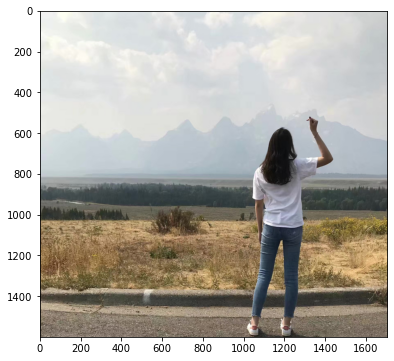

In [105]:
# This code plots a photo. Ignore this for now - we will cover plotting in a later class.
plt.figure(figsize=(8,6)) # 调窗格大小
plt.imshow(photo)

### `plt.savefig()`save当前图片

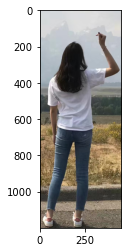

In [113]:
plt.imshow(photo[400:1600,1000:1450])
plt.savefig("fullheight.jpg") # 保存图片

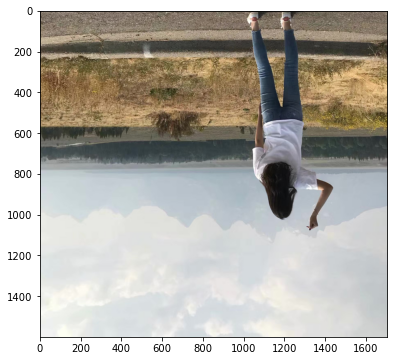

In [114]:
# 相当于只对 行 操作（反向读取），列和纵深都省略
plt.figure(figsize=(8,6))
plt.imshow(photo[::-1]);

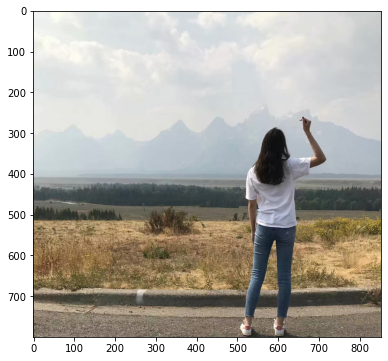

In [115]:
plt.figure(figsize=(8,6))
compressed = photo[::2, ::2]
plt.imshow(compressed);
plt.imsave("hql_compressed.jpg",compressed)

### `where`的第二种用法

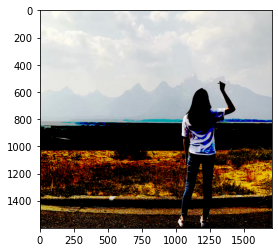

In [118]:
# when np.where is used with 3 arguments, it replaces all True elements with the second, and all False elements with the third
photo_masked = np.where(photo > 155, photo, 0) 
plt.imshow(photo_masked);

array([[[  0,   0, 242],
        [  0,   0, 242],
        [  0,   0, 242],
        ...,
        [  0,   0, 204],
        [  0,   0, 203],
        [  0,   0, 201]],

       [[  0,   0, 242],
        [  0,   0, 242],
        [  0,   0, 242],
        ...,
        [  0,   0, 204],
        [  0,   0, 203],
        [  0,   0, 201]],

       [[  0,   0, 242],
        [  0,   0, 242],
        [  0,   0, 242],
        ...,
        [  0,   0, 204],
        [  0,   0, 203],
        [  0,   0, 201]],

       ...,

       [[  0,   0, 151],
        [  0,   0, 151],
        [  0,   0, 127],
        ...,
        [  0,   0, 142],
        [  0,   0, 123],
        [  0,   0,  99]],

       [[  0,   0, 111],
        [  0,   0,  98],
        [  0,   0, 101],
        ...,
        [  0,   0, 139],
        [  0,   0, 122],
        [  0,   0, 101]],

       [[  0,   0, 110],
        [  0,   0,  76],
        [  0,   0,  66],
        ...,
        [  0,   0, 120],
        [  0,   0, 128],
        [  0,   0, 113]]

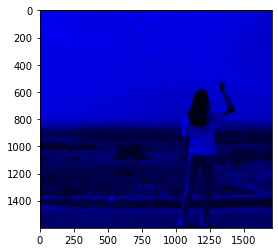

In [120]:
photo_onlyblue = np.copy(photo)
photo_onlyblue[:, :, :-1] = 0
plt.imshow(photo_onlyblue)

Apply the "Matrix Color" formula:
<img src="files/matrix_color_formula.png" />

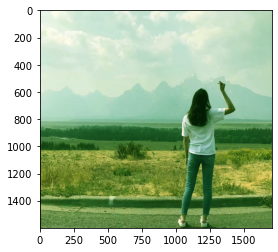

In [118]:
photo_matrix = np.array(photo, dtype=np.float32)

#Normalize: [0,255] -> [0,1]
photo_matrix /= 255
# apply the matrix formula
photo_matrix[:, :, 0] **= (3/2)
photo_matrix[:, :, 1] **= (4/5)
photo_matrix[:, :, 2] **= (3/2)

# De-normalize: [0,1] -> [0,255]
photo_matrix = (photo_matrix*255).astype(np.uint8)
plt.imshow(photo_matrix);

# Linear algebra

向量化代码是使用Python/Numpy编写高效数值计算的关键。

这意味着**一个程序应该尽可能多地用矩阵和向量运算**来表示，比如矩阵和矩阵乘法。

## Array与数字运算：+-×÷

我们可以使用通常的算术运算符用标量数对数组进行乘、加、减和除。

In [134]:
v1 = np.arange(0, 5)

In [135]:
v1 * 2

array([0, 2, 4, 6, 8])

In [105]:
v1 + 2

array([2, 3, 4, 5, 6])

In [106]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [107]:
A + 2

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. 

**Source**

This notebook was adapted from:
* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
* Scientific Python and Data Science course by Roberta Sinatra and Michael Szell
* a lecture of J.R. Johansson (http://jrjohansson.github.io)
* Python for Data Analysis by Wes McKinney

In [178]:
A = np.matrix(range(1,10)).reshape(3,3);A

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [154]:
u, sigma, vt = np.linalg.svd(A)

In [179]:
u, sigma, vt

(matrix([[-0.21483724,  0.88723069,  0.40824829],
         [-0.52058739,  0.24964395, -0.81649658],
         [-0.82633754, -0.38794278,  0.40824829]]),
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]),
 matrix([[-0.47967118, -0.57236779, -0.66506441],
         [-0.77669099, -0.07568647,  0.62531805],
         [ 0.40824829, -0.81649658,  0.40824829]]))

In [180]:
vt[:,0]

matrix([[-0.47967118],
        [-0.77669099],
        [ 0.40824829]])

In [182]:
vt[:,0]

matrix([[-0.47967118],
        [-0.77669099],
        [ 0.40824829]])

In [289]:
A_0 = sigma[0]*np.dot(u[:,0], vt[0])

In [290]:
A_0_new = sigma[0]*u[:,0]*vt[0]

In [184]:
A_1 = sigma[1]*np.dot(u[:,1], vt[1])

In [185]:
A_2 = sigma[2]*np.dot(u[:,2], vt[2])

In [186]:
A_0+A_1+A_2

matrix([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

# 线性代数补充

<font color = 'darkred'> 
    总结：1. 用np.matrix来定义矩阵,防止错误！
    2. 用.dot来做矩阵乘法，防止错误！

## 向量运算

### Array

In [1]:
a = np.array([1,2,3])
b = np.array([2,2,3])
a, b

(array([1, 2, 3]), array([2, 2, 3]))

#### Array *乘法默认Hadamard product，不考察行列

In [2]:
a * b

array([2, 4, 9])

In [3]:
a.T * b #没有转置这一说¶

array([2, 4, 9])

#### Array dot乘法默认内积,不考察行列¶

In [4]:
a.dot(b)

15

In [257]:
a.dot(b.T)

15

### Matrix

#### Array转Matrix默认形状不变！

In [229]:
a = np.matrix(a)
b = np.matrix(b)
a, a.shape, b, b.shape #行向量

(matrix([[1, 2, 3]]), (1, 3), matrix([[2, 2, 3]]), (1, 3))

In [230]:
np.matrix(np.array([[1],[2],[3]])) #列向量

matrix([[1],
        [2],
        [3]])

#### Matrix *乘法默认内积，考察行列

In [231]:
a * b

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [232]:
a.T * b #前列后行

matrix([[2, 2, 3],
        [4, 4, 6],
        [6, 6, 9]])

In [233]:
a * b.T

matrix([[15]])

#### Matrix dot乘法等价于*乘法

In [236]:
a.T.dot(b)

matrix([[2, 2, 3],
        [4, 4, 6],
        [6, 6, 9]])

In [237]:
a.dot(b.T)

matrix([[15]])

## 向量与矩阵运算

### Array

In [240]:
A = np.array(range(1,10)).reshape(3,3)
B = np.diag([1,1,2])
a = np.array([1,2,3])
b = np.array([2,2,3])
a, b, A, B

(array([1, 2, 3]),
 array([2, 2, 3]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 2]]))

#### Array *乘法默认Hadamard product，不考察行列¶

In [243]:
A * a

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

#### 转置对Array向量无效，Array矩阵有效

In [246]:
A.T * a

array([[ 1,  8, 21],
       [ 2, 10, 24],
       [ 3, 12, 27]])

#### Array dot乘法默认内积,不考察行列¶¶

In [247]:
A.dot(a)

array([14, 32, 50])

In [260]:
A.dot(a.T)

array([14, 32, 50])

### Matrix

#### Array转Matrix默认形状不变！¶

In [269]:
a = np.matrix(a)
b = np.matrix(b)
A = np.matrix(A)
B = np.matrix(B)
a, b, A, B

(matrix([[1, 2, 3]]),
 matrix([[2, 2, 3]]),
 matrix([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 matrix([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 2]]))

#### Matrix *乘法默认内积，考察行列¶¶

In [271]:
A * a

ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [272]:
A * a.T #a本身是行向量

matrix([[14],
        [32],
        [50]])

#### Matrix dot乘法等价于*乘法

In [273]:
A.dot(a)

ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [274]:
A.dot(a.T)

matrix([[14],
        [32],
        [50]])

## 矩阵运算

In [275]:
A = np.array(range(1,10)).reshape(3,3)
B = np.diag([1,1,2])
A, B

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 2]]))

### Array

#### Array *乘法默认Hadamard product，不考察行列¶¶

In [276]:
A * B #array *乘 对位

array([[ 1,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 18]])

#### Array dot乘法默认内积,不考察行列¶¶

In [277]:
A.dot(B) #array dot 点乘（内积）

array([[ 1,  2,  6],
       [ 4,  5, 12],
       [ 7,  8, 18]])

### Matrix

In [278]:
A = np.matrix(A)
B = np.matrix(B)

#### Matrix *乘法默认内积，考察行列¶¶

In [279]:
A * B #matrix *乘==点乘（内积）

matrix([[ 1,  2,  6],
        [ 4,  5, 12],
        [ 7,  8, 18]])

#### Matrix dot乘法等价于*乘法

In [280]:
A.dot(B) #matrix *乘==点乘（内积）

matrix([[ 1,  2,  6],
        [ 4,  5, 12],
        [ 7,  8, 18]])